IMPORTATION DES PACKAGES 

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

CHARGEMENT DES DONNEES 

In [112]:
data = pd.read_csv("dataset_sdn.csv")

EXPLORATION DES DONNEES

In [113]:
data.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1402,0,0.0,0.0,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,1,3775,1492,0,0.0,0.0,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,2,3845,1402,0,0.0,0.0,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,4,354583059,4295,16578,0.0,16578.0,0


In [114]:
data.shape

(104345, 23)

ANALYSE DES DONNEES 

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [116]:
data.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [117]:
data.tail(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104335,5232,3,10.0.0.5,10.0.0.11,1,98,1,788000000,1.788000e+09,5,...,0,0,ICMP,2,3136,3458,0,0.0,0.0,0
104336,5262,3,10.0.0.7,10.0.0.5,79,7742,81,867000000,8.186700e+10,5,...,0,0,ICMP,2,3409,3731,0,0.0,0.0,0
104337,5262,3,10.0.0.7,10.0.0.5,79,7742,81,867000000,8.186700e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104338,5262,3,10.0.0.7,10.0.0.5,79,7742,81,867000000,8.186700e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104339,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,2,3409,3731,0,0.0,0.0,0
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0
104344,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,3,15099,14693,1,1.0,2.0,0


In [118]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [119]:
data["src"].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [120]:
data["dst"].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [121]:
data["tot_dur"].unique()

array([1.0100e+11, 2.8100e+11, 2.0100e+11, ..., 8.1867e+10, 8.1842e+10,
       3.1805e+10])

In [122]:
data["Protocol"].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

TRAITEMENT DES DONNEES

In [123]:
labeling_IP_dst= LabelEncoder()
data["src"]= labeling_IP_dst.fit_transform(data["src"])
data["dst"]= labeling_IP_dst.fit_transform(data["dst"])
data["tot_dur"]= labeling_IP_dst.fit_transform(data["tot_dur"])
data["Protocol"]= labeling_IP_dst.fit_transform(data["Protocol"])

In [124]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  int32  
 3   dst          104345 non-null  int32  
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  int64  
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  int32  
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [125]:
data.drop(['rx_kbps'], axis=1, inplace=True)

In [126]:
data.drop(['tot_kbps'], axis=1, inplace=True)

In [127]:
data.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
label          0
dtype: int64

In [128]:
data.head (10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,label
0,11425,1,0,16,45304,48294064,100,716000000,3447,3,...,13535,14428310,451,0,2,3,143928631,3917,0,0
1,11605,1,0,16,126395,134737070,280,734000000,3627,2,...,13531,14424046,451,0,2,4,3842,3520,0,0
2,11425,1,10,16,90333,96294978,200,744000000,3547,3,...,13534,14427244,451,0,2,1,3795,1242,0,0
3,11425,1,10,16,90333,96294978,200,744000000,3547,3,...,13534,14427244,451,0,2,2,3688,1492,0,0
4,11425,1,10,16,90333,96294978,200,744000000,3547,3,...,13534,14427244,451,0,2,3,3413,3665,0,0
5,11425,1,10,16,90333,96294978,200,744000000,3547,3,...,13534,14427244,451,0,2,1,3795,1402,0,0
6,11425,1,0,16,45304,48294064,100,716000000,3447,3,...,13535,14428310,451,0,2,4,3665,3413,0,0
7,11425,1,0,16,45304,48294064,100,716000000,3447,3,...,13535,14428310,451,0,2,1,3775,1492,0,0
8,11425,1,0,16,45304,48294064,100,716000000,3447,3,...,13535,14428310,451,0,2,2,3845,1402,0,0
9,11425,1,10,16,90333,96294978,200,744000000,3547,3,...,13534,14427244,451,0,2,4,354583059,4295,16578,0


In [129]:
data['src'].unique()

array([ 0, 10, 13,  1, 12, 14,  4, 15, 11,  2,  3,  9, 17, 16, 18,  5,  6,
        7,  8])

In [130]:
data.shape

(104345, 21)

In [131]:
data.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,label
104340,5262,3,14,15,79,7742,81,842000000,2882,5,...,29,2842,0,0,0,1,15209,12720,1,0
104341,5262,3,14,15,79,7742,81,842000000,2882,5,...,29,2842,0,0,0,3,15099,14693,1,0
104342,5262,3,2,13,31,3038,31,805000000,1125,5,...,30,2940,1,0,0,2,3409,3731,0,0
104343,5262,3,2,13,31,3038,31,805000000,1125,5,...,30,2940,1,0,0,1,15209,12720,1,0
104344,5262,3,2,13,31,3038,31,805000000,1125,5,...,30,2940,1,0,0,3,15099,14693,1,0


AFFICHAGE DE LA MATRICE DE CORELATION

<Axes: >

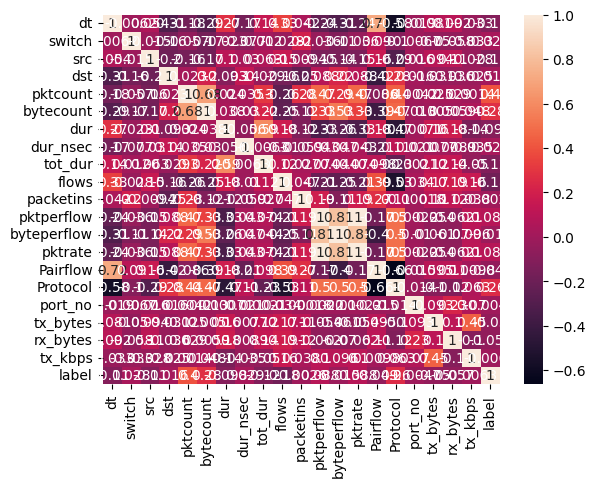

In [132]:
sns.heatmap(data.corr(),annot=True)

In [133]:
data.corr().label.sort_values(ascending=False)

label          1.000000
pktcount       0.401894
bytecount      0.277481
Protocol       0.258355
pktrate        0.088013
pktperflow     0.087819
dur_nsec       0.029064
switch         0.028027
dst            0.016282
packetins     -0.002642
port_no       -0.004734
tx_kbps       -0.006297
byteperflow   -0.015192
Pairflow      -0.049159
tx_bytes      -0.050115
rx_bytes      -0.057490
dur           -0.098479
dt            -0.110126
src           -0.110399
tot_dur       -0.118423
flows         -0.182174
Name: label, dtype: float64

In [134]:
data.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
label          0
dtype: int64

In [135]:
sub_data = data[['pktcount','bytecount','Protocol','src', 'pktrate','pktperflow','dur_nsec','switch', 'dst', 'label']]

In [136]:
print(sub_data.shape)
sub_data.head()

(104345, 10)


,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst,label
0,45304,48294064,2,0,451,13535,716000000,1,16,0
1,126395,134737070,2,0,451,13531,734000000,1,16,0
2,90333,96294978,2,10,451,13534,744000000,1,16,0
3,90333,96294978,2,10,451,13534,744000000,1,16,0
4,90333,96294978,2,10,451,13534,744000000,1,16,0


<Axes: >

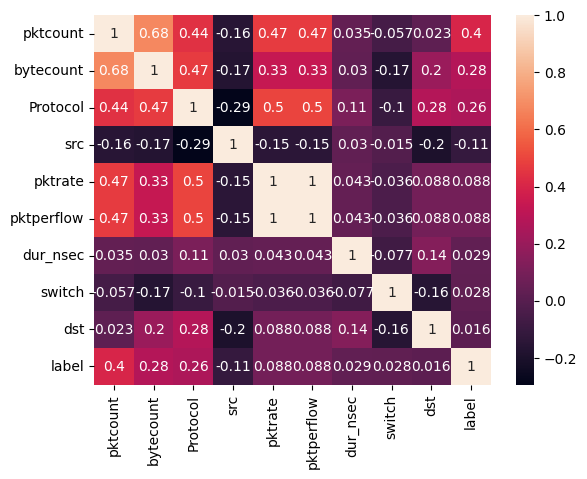

In [137]:
sns.heatmap(sub_data.corr(), annot=True)

In [138]:
#variable independante
X = sub_data.iloc[ : , :-1]
#Variable dependante
y = sub_data.iloc[ : , -1]

In [139]:
X

,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst
0,45304,48294064,2,0,451,13535,716000000,1,16
1,126395,134737070,2,0,451,13531,734000000,1,16
2,90333,96294978,2,10,451,13534,744000000,1,16
3,90333,96294978,2,10,451,13534,744000000,1,16
4,90333,96294978,2,10,451,13534,744000000,1,16
...,...,...,...,...,...,...,...,...,...
104340,79,7742,0,14,0,29,842000000,3,15
104341,79,7742,0,14,0,29,842000000,3,15
104342,31,3038,0,2,1,30,805000000,3,13
104343,31,3038,0,2,1,30,805000000,3,13


In [140]:
y

0         0
1         0
2         0
3         0
4         0
         ..
104340    0
104341    0
104342    0
104343    0
104344    0
Name: label, Length: 104345, dtype: int64

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [142]:
sub_data.shape

(104345, 10)

In [143]:
#standardisation des données
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

CREATION DES SHALLOW NEURAL NETWORK

In [144]:
#import tensorflow as tsf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [145]:
model=Sequential()

In [146]:
#ajout de le première couche couche d'entrée
model.add(Dense(10, input_shape=(9,),activation="relu"))

#couche de sortie
model.add(Dense(1,activation="sigmoid"))

#compile le model
model.compile(optimizer=Adam(learning_rate=0.01), loss="binary_crossentropy",metrics=["accuracy"])

#affichage de l'architecture du reseau de neuronne
model.summary()

C:\Users\User\anaconda3\envs\machlearn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

Entrainement du modele

In [147]:
history=model.fit(X_train, y_train, epochs=50,verbose=1,validation_data=(X_test, y_test))

Epoch 1/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8562 - loss: 0.3000 - val_accuracy: 0.9396 - val_loss: 0.1680
Epoch 2/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9317 - loss: 0.1692 - val_accuracy: 0.9404 - val_loss: 0.1533
Epoch 3/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9369 - loss: 0.1505 - val_accuracy: 0.9462 - val_loss: 0.1336
Epoch 4/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9409 - loss: 0.1418 - val_accuracy: 0.9448 - val_loss: 0.1360
Epoch 5/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9409 - loss: 0.1385 - val_accuracy: 0.9420 - val_loss: 0.1272
Epoch 6/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9404 - loss: 0.1343 - val_accuracy: 0.9421 - val_loss: 0.1262
Epoch 7/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9412 - loss: 0.1319 - val_accuracy: 0.9407 - val_loss: 0.1332
Epoch 8/50
2283/2283 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9426 - loss: 0.125

visualisation de l'entrainnement du reseau de neuronne

In [148]:
epoch_accuracy=history.history["accuracy"]
epoch_loss=history.history["loss"]

epoch_val_accuracy=history.history["val_accuracy"]
epoch_val_loss=history.history["val_loss"]

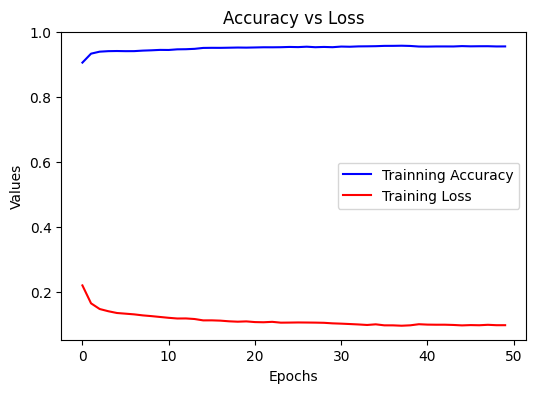

In [149]:
plt.figure(figsize=(6,4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color="blue",label="Trainning Accuracy")
plt.plot(range(0,len(epoch_loss)), epoch_loss, color="red", label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Values")
plt.title("Accuracy vs Loss")
plt.legend()
plt.show()

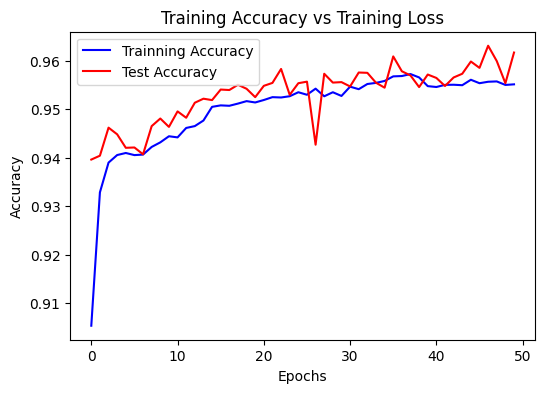

In [150]:
plt.figure(figsize=(6,4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color="blue",label="Trainning Accuracy")
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color="red", label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Training Loss")
plt.legend()
plt.show()

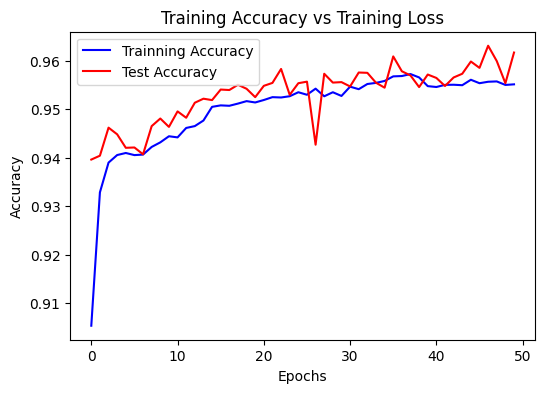

In [151]:
plt.figure(figsize=(6,4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color="blue",label="Trainning Accuracy")
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color="red", label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Training Loss")
plt.legend()
plt.show()

EVALUATION DU MODELS

 Prediction les Sorties

In [152]:
y_pred = model.predict(X_test)
y_pred

979/979 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.9999998 ],
       [0.99558365],
       [0.9999418 ],
       ...,
       [0.99999994],
       [0.9572023 ],
       [1.        ]], dtype=float32)

Sauvegarder le modèle entrainé

In [153]:
model.save('model.h5')

Simple Prediction

In [154]:
sub_data.head()

,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst,label
0,45304,48294064,2,0,451,13535,716000000,1,16,0
1,126395,134737070,2,0,451,13531,734000000,1,16,0
2,90333,96294978,2,10,451,13534,744000000,1,16,0
3,90333,96294978,2,10,451,13534,744000000,1,16,0
4,90333,96294978,2,10,451,13534,744000000,1,16,0


In [155]:
model.predict(scaler.transform([[45304,	48294064,	2,	1,	451,	13535,	716000000,	1,	16]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


C:\Users\User\anaconda3\envs\machlearn\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.00014585]], dtype=float32)

In [156]:
sub_data[sub_data['label'] == 1]

,pktcount,bytecount,Protocol,src,pktrate,pktperflow,dur_nsec,switch,dst,label
91,4777,5092282,2,0,0,0,711000000,1,16,1
92,4777,5092282,2,0,0,0,711000000,1,16,1
93,4777,5092282,2,0,0,0,711000000,1,16,1
94,4777,5092282,2,0,0,0,711000000,1,16,1
95,4777,5092282,2,0,0,0,711000000,1,16,1
...,...,...,...,...,...,...,...,...,...,...
100037,129558,134999436,0,18,101,3049,981000000,4,14,1
100038,129558,134999436,0,18,101,3049,981000000,4,14,1
100051,129986,135445412,0,15,101,3049,235000000,3,17,1
100052,129986,135445412,0,15,101,3049,235000000,3,17,1


In [157]:
resultats_1 = model.predict(scaler.transform([[45304,	48294064,	2,	1,	451,	13535,	716000000,	1,	16]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


C:\Users\User\anaconda3\envs\machlearn\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [158]:
resultats_2 = model.predict(scaler.transform([[4777,	5092282,	2,	1,	0,	0,	711000000,	1,	16	]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


C:\Users\User\anaconda3\envs\machlearn\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [159]:
resultats_2

array([[0.99997973]], dtype=float32)

In [160]:
if resultats_2 > 0.5:
    print("Malign")
else :
    print("Benign")

Malign
